# Comparing Activation Functions

In this notebook, we will try different activation functions on the multi-label irrigation machine dataset.

The activations functions we'll be comparing are `relu`,`leaky_relu`, `sigmoid`, and `tanh`.

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Import the sequential model and dense layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.utils import to_categorical

2024-07-29 22:56:42.149855: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# read the data
irrigation_machine = pd.read_csv('data/irrigation_machine.csv')
irrigation_machine.head()

,Unnamed: 0,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,...,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0
1,1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,...,4.0,5.0,5.0,2.0,2.0,2.0,7.0,0,0,0
2,2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,...,3.0,3.0,1.0,0.0,3.0,1.0,0.0,1,1,0
3,3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,...,4.0,1.0,1.0,4.0,1.0,3.0,2.0,0,0,0
4,4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,...,1.0,3.0,2.0,2.0,1.0,1.0,0.0,1,1,0


In [3]:
irrigation_machine.describe()

,Unnamed: 0,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.00000,2000.000000,2000.000000
mean,999.500000,1.437000,1.659000,2.654500,2.674500,2.887500,1.411000,3.315500,4.201500,1.214000,...,2.731500,3.416000,1.206500,2.325000,1.729500,2.27450,1.813500,0.63550,0.730500,0.212000
std,577.494589,1.321327,1.338512,1.699286,1.855875,1.816451,1.339394,2.206444,2.280241,1.386782,...,1.774537,1.960578,1.258034,1.715181,1.561265,1.67169,1.469285,0.48141,0.443811,0.408827
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
25%,499.750000,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,2.000000,3.000000,0.000000,...,1.000000,2.000000,0.000000,1.000000,0.000000,1.00000,1.000000,0.00000,0.000000,0.000000
50%,999.500000,1.000000,1.000000,2.000000,2.000000,3.000000,1.000000,3.000000,4.000000,1.000000,...,2.000000,3.000000,1.000000,2.000000,1.000000,2.00000,2.000000,1.00000,1.000000,0.000000
75%,1499.250000,2.000000,2.000000,4.000000,4.000000,4.000000,2.000000,5.000000,6.000000,2.000000,...,4.000000,5.000000,2.000000,3.000000,3.000000,3.00000,3.000000,1.00000,1.000000,0.000000
max,1999.000000,8.000000,9.000000,10.000000,11.000000,12.000000,7.000000,13.000000,12.000000,8.000000,...,11.000000,11.000000,6.000000,10.000000,11.000000,10.00000,7.000000,1.00000,1.000000,1.000000


In [4]:
irrigation_machine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2000 non-null   int64  
 1   sensor_0    2000 non-null   float64
 2   sensor_1    2000 non-null   float64
 3   sensor_2    2000 non-null   float64
 4   sensor_3    2000 non-null   float64
 5   sensor_4    2000 non-null   float64
 6   sensor_5    2000 non-null   float64
 7   sensor_6    2000 non-null   float64
 8   sensor_7    2000 non-null   float64
 9   sensor_8    2000 non-null   float64
 10  sensor_9    2000 non-null   float64
 11  sensor_10   2000 non-null   float64
 12  sensor_11   2000 non-null   float64
 13  sensor_12   2000 non-null   float64
 14  sensor_13   2000 non-null   float64
 15  sensor_14   2000 non-null   float64
 16  sensor_15   2000 non-null   float64
 17  sensor_16   2000 non-null   float64
 18  sensor_17   2000 non-null   float64
 19  sensor_18   2000 non-null  

In [5]:
def create_model(activation_function, hidden_neurons=64, optimizer='adam', loss='categorical_crossentropy', print_summary=False):
    # Instantiate a Sequential model
    model = Sequential()

    # accepts input data with 20 features
    model.add(Input(shape=(20,)))

    # Add a hidden layer of 64 neurons and a 20 neuron's input
    model.add(Dense(hidden_neurons, activation=activation_function))

    # Add an output layer of 3 neuron (1 for each unique target variable class) with sigmoid activation
    model.add(Dense(3, activation='softmax'))

    # Compile model with adam optimizer to adjust each parameter's learning rate individually and
    # set loss to categorical crossentropy to measure classification model where output probability ranges from 0-1
    model.compile(optimizer=optimizer,
            loss = loss,
            metrics=['accuracy'])
    
    if print_summary:
        model.summary()
    
    return model

In [6]:
def train_and_evaluate(model, X_train, y_train, X_val, y_val, X_test, y_test, epochs=200):
    history = model.fit(X_train, y_train,
                        epochs=epochs,
                        validation_data=(X_val, y_val),
                        verbose=0)
    
    test_loss, test_accuracy = model.evaluate(X_test,
                                              y_test,
                                              verbose=0)
    
    return history, test_loss, test_accuracy

In [8]:
sensors = irrigation_machine.drop(columns=['Unnamed: 0','parcel_0', 'parcel_1', 'parcel_2'], axis=1).values
scaler = StandardScaler()
sensors = scaler.fit_transform(sensors)

parcels = irrigation_machine[['parcel_0', 'parcel_1', 'parcel_2']].values

# convert parcels to one-hot encoded format
parcels_onehot = to_categorical(np.argmax(parcels, axis=1))

X_train_val, X_test, y_train_val, y_test = train_test_split(sensors,
                                                            parcels,
                                                            test_size=0.2,
                                                            random_state=42)

# split X_train_val into training & validation datasets
X_train, X_val, y_train, y_val = train_test_split(X_train_val,
                                                  y_train_val,
                                                  test_size=0.2,
                                                  random_state=42)

In [9]:
# activations to include: ReLU, sigmoid and hyperbolic tangent
activation_functions = ['relu', 'sigmoid', 'tanh']

activation_results = {}
val_loss_per_function = {}
val_acc_per_function = {}

for af in activation_functions:
    model = create_model(af)
    history, test_loss, test_accuracy = train_and_evaluate(model, X_train, y_train, X_val, y_val, X_test, y_test)
    activation_results[af] = {'history':history,
                              'test_loss':test_loss,
                              'test_accuracy':test_accuracy}
    
    # store validation loss and accuracy for each epoch
    val_loss_per_function[af] = history.history['val_loss']
    val_acc_per_function[af] = history.history['val_accuracy']

for af, result in activation_results.items():
    print(f'Activation: {af}, Test Accuracy: {result["test_accuracy"]:.4f}')


# create dataframes from val_loss_per_function and val_acc_per_function
val_loss_df = pd.DataFrame(val_loss_per_function)
val_acc_df = pd.DataFrame(val_acc_per_function)


Activation: relu, Test Accuracy: 0.6025
Activation: sigmoid, Test Accuracy: 0.2375
Activation: tanh, Test Accuracy: 0.2575


In [10]:
# helper function to plot curve
def plot_curve(df, title=None, ylabel=None):
    plt.figure()
    df.plot()
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel(ylabel)
    plt.legend(title='Activation Function')
    plt.show()

<Figure size 640x480 with 0 Axes>

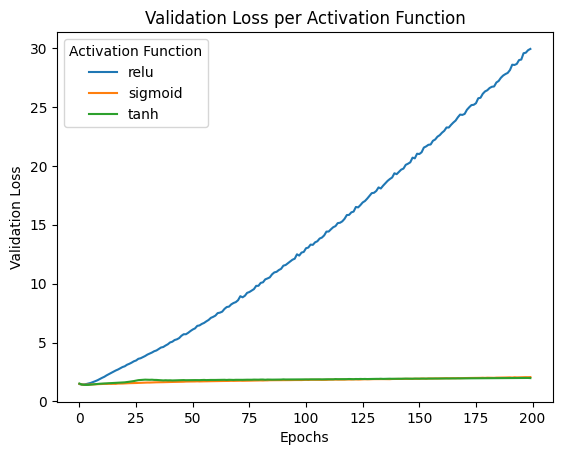

In [11]:
plot_curve(val_loss_df, 'Validation Loss per Activation Function', 'Validation Loss')

<Figure size 640x480 with 0 Axes>

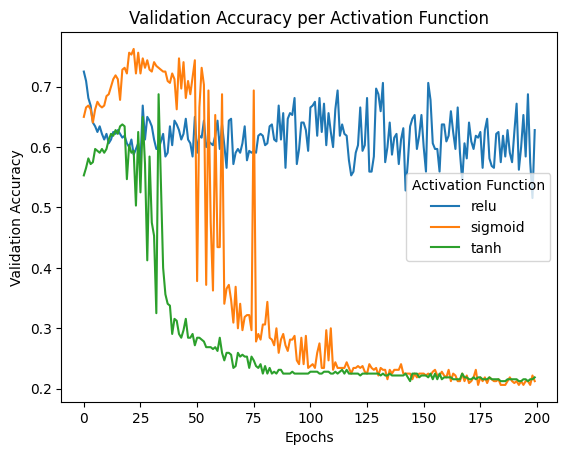

In [12]:
plot_curve(val_acc_df, 'Validation Accuracy per Activation Function', 'Validation Accuracy')